In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.signal import savgol_filter

In [3]:
df = pd.read_csv('data_conf_desp.csv')

In [4]:
df

,MONTH,DIAS,FLOTA_A,FLOTA_B,FLOTA_C,FLOTA_D
0,ENERO,31,14,5,6,4
1,FEBRERO,28,19,7,9,9
2,MARZO,31,10,10,9,9
3,ABRIL,30,12,6,12,10
4,MAYO,31,15,7,15,11
5,JUNIO,30,18,8,8,8
6,JULIO,31,17,7,14,7
7,AGOSTO,31,16,4,11,4
8,SEPTIEMBRE,30,9,9,9,6
9,OCTUBRE,31,15,5,12,5


In [5]:
df['EVENTOS'] = df[['FLOTA_A','FLOTA_B','FLOTA_C','FLOTA_D']].sum(axis=1)


In [6]:
df

,MONTH,DIAS,FLOTA_A,FLOTA_B,FLOTA_C,FLOTA_D,EVENTOS
0,ENERO,31,14,5,6,4,29
1,FEBRERO,28,19,7,9,9,44
2,MARZO,31,10,10,9,9,38
3,ABRIL,30,12,6,12,10,40
4,MAYO,31,15,7,15,11,48
5,JUNIO,30,18,8,8,8,42
6,JULIO,31,17,7,14,7,45
7,AGOSTO,31,16,4,11,4,35
8,SEPTIEMBRE,30,9,9,9,6,33
9,OCTUBRE,31,15,5,12,5,37


In [7]:
vuelodia_fa=8
vuelodia_fb=8
vuelodia_fc=4
vuelodia_fd=7

In [8]:
df['TR_FLOTA_A'] = (df.DIAS*vuelodia_fa)
df['TR_FLOTA_B'] = (df.DIAS*vuelodia_fb)
df['TR_FLOTA_C'] = (df.DIAS*vuelodia_fc)
df['TR_FLOTA_D'] = (df.DIAS*vuelodia_fd)

In [9]:
df

,MONTH,DIAS,FLOTA_A,FLOTA_B,FLOTA_C,FLOTA_D,EVENTOS,TR_FLOTA_A,TR_FLOTA_B,TR_FLOTA_C,TR_FLOTA_D
0,ENERO,31,14,5,6,4,29,248,248,124,217
1,FEBRERO,28,19,7,9,9,44,224,224,112,196
2,MARZO,31,10,10,9,9,38,248,248,124,217
3,ABRIL,30,12,6,12,10,40,240,240,120,210
4,MAYO,31,15,7,15,11,48,248,248,124,217
5,JUNIO,30,18,8,8,8,42,240,240,120,210
6,JULIO,31,17,7,14,7,45,248,248,124,217
7,AGOSTO,31,16,4,11,4,35,248,248,124,217
8,SEPTIEMBRE,30,9,9,9,6,33,240,240,120,210
9,OCTUBRE,31,15,5,12,5,37,248,248,124,217


In [10]:
df['TURE_REVENUES'] = df[['TR_FLOTA_A','TR_FLOTA_B','TR_FLOTA_C','TR_FLOTA_D']].sum(axis=1)

In [11]:
df

,MONTH,DIAS,FLOTA_A,FLOTA_B,FLOTA_C,FLOTA_D,EVENTOS,TR_FLOTA_A,TR_FLOTA_B,TR_FLOTA_C,TR_FLOTA_D,TURE_REVENUES
0,ENERO,31,14,5,6,4,29,248,248,124,217,837
1,FEBRERO,28,19,7,9,9,44,224,224,112,196,756
2,MARZO,31,10,10,9,9,38,248,248,124,217,837
3,ABRIL,30,12,6,12,10,40,240,240,120,210,810
4,MAYO,31,15,7,15,11,48,248,248,124,217,837
5,JUNIO,30,18,8,8,8,42,240,240,120,210,810
6,JULIO,31,17,7,14,7,45,248,248,124,217,837
7,AGOSTO,31,16,4,11,4,35,248,248,124,217,837
8,SEPTIEMBRE,30,9,9,9,6,33,240,240,120,210,810
9,OCTUBRE,31,15,5,12,5,37,248,248,124,217,837


In [12]:
TR=df['TURE_REVENUES'].sum(axis=0)

In [13]:
TR

9855

In [14]:
df['SR_MENSUAL'] = 100-(df.EVENTOS/df.TURE_REVENUES)*100


In [15]:
df

,MONTH,DIAS,FLOTA_A,FLOTA_B,FLOTA_C,FLOTA_D,EVENTOS,TR_FLOTA_A,TR_FLOTA_B,TR_FLOTA_C,TR_FLOTA_D,TURE_REVENUES,SR_MENSUAL
0,ENERO,31,14,5,6,4,29,248,248,124,217,837,96.535245
1,FEBRERO,28,19,7,9,9,44,224,224,112,196,756,94.179894
2,MARZO,31,10,10,9,9,38,248,248,124,217,837,95.459976
3,ABRIL,30,12,6,12,10,40,240,240,120,210,810,95.061728
4,MAYO,31,15,7,15,11,48,248,248,124,217,837,94.265233
5,JUNIO,30,18,8,8,8,42,240,240,120,210,810,94.814815
6,JULIO,31,17,7,14,7,45,248,248,124,217,837,94.623656
7,AGOSTO,31,16,4,11,4,35,248,248,124,217,837,95.818399
8,SEPTIEMBRE,30,9,9,9,6,33,240,240,120,210,810,95.925926
9,OCTUBRE,31,15,5,12,5,37,248,248,124,217,837,95.579450


In [16]:
#df['SR_TRIMESTRAL'] = 100-(df.EVENTOS/df.TURE_REVENUES)*100
#df['SR_TRIMESTRAL'] = df[['TR_FLOTA_A','TR_FLOTA_B','TR_FLOTA_C']].sum(axis=1)

In [17]:
df['SR_FLOTA_A'] = 100-(df.FLOTA_A/df.TR_FLOTA_A)*100
df['SR_FLOTA_B'] = 100-(df.FLOTA_B/df.TR_FLOTA_B)*100
df['SR_FLOTA_C'] = 100-(df.FLOTA_C/df.TR_FLOTA_C)*100
df['SR_FLOTA_D'] = 100-(df.FLOTA_D/df.TR_FLOTA_D)*100

In [18]:
df

,MONTH,DIAS,FLOTA_A,FLOTA_B,FLOTA_C,FLOTA_D,EVENTOS,TR_FLOTA_A,TR_FLOTA_B,TR_FLOTA_C,TR_FLOTA_D,TURE_REVENUES,SR_MENSUAL,SR_FLOTA_A,SR_FLOTA_B,SR_FLOTA_C,SR_FLOTA_D
0,ENERO,31,14,5,6,4,29,248,248,124,217,837,96.535245,94.354839,97.983871,95.161290,98.156682
1,FEBRERO,28,19,7,9,9,44,224,224,112,196,756,94.179894,91.517857,96.875000,91.964286,95.408163
2,MARZO,31,10,10,9,9,38,248,248,124,217,837,95.459976,95.967742,95.967742,92.741935,95.852535
3,ABRIL,30,12,6,12,10,40,240,240,120,210,810,95.061728,95.000000,97.500000,90.000000,95.238095
4,MAYO,31,15,7,15,11,48,248,248,124,217,837,94.265233,93.951613,97.177419,87.903226,94.930876
5,JUNIO,30,18,8,8,8,42,240,240,120,210,810,94.814815,92.500000,96.666667,93.333333,96.190476
6,JULIO,31,17,7,14,7,45,248,248,124,217,837,94.623656,93.145161,97.177419,88.709677,96.774194
7,AGOSTO,31,16,4,11,4,35,248,248,124,217,837,95.818399,93.548387,98.387097,91.129032,98.156682
8,SEPTIEMBRE,30,9,9,9,6,33,240,240,120,210,810,95.925926,96.250000,96.250000,92.500000,97.142857
9,OCTUBRE,31,15,5,12,5,37,248,248,124,217,837,95.579450,93.951613,97.983871,90.322581,97.695853


In [19]:
#GUARDAMOS EL DATASET GENERADO PARA UTILIZARLO EN UN PANEL INTERACTIVO EN POWER BI
df.to_csv('data_powerBI_2.csv')

<ipython-input-20-48f8a8769541>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, '-ok', color='blue')


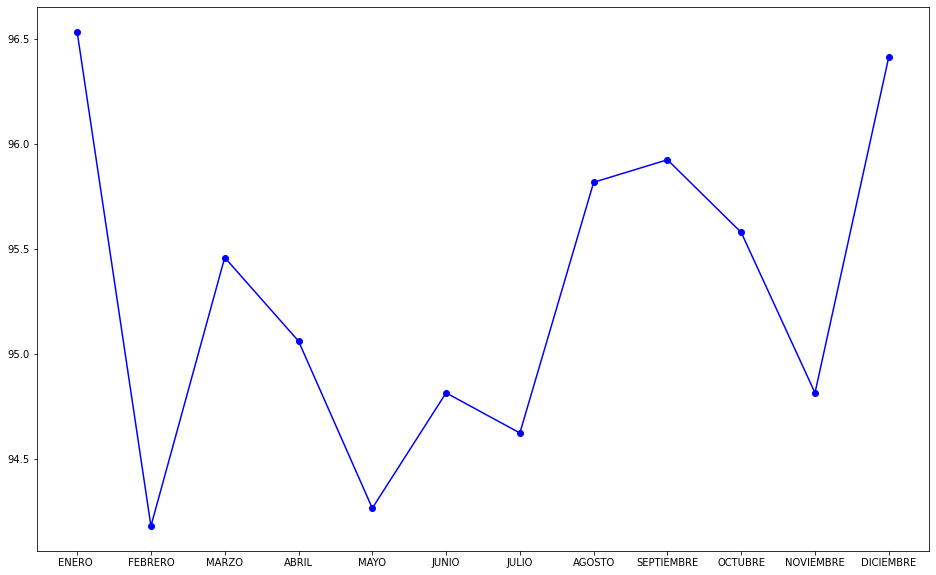

In [20]:
plt.figure(figsize=(16,10))
x =df ["MONTH"].values
y =df ["SR_MENSUAL"].values
plt.plot(x, y, '-ok', color='blue')

Text(0.5, 1.0, 'FLOTAS')

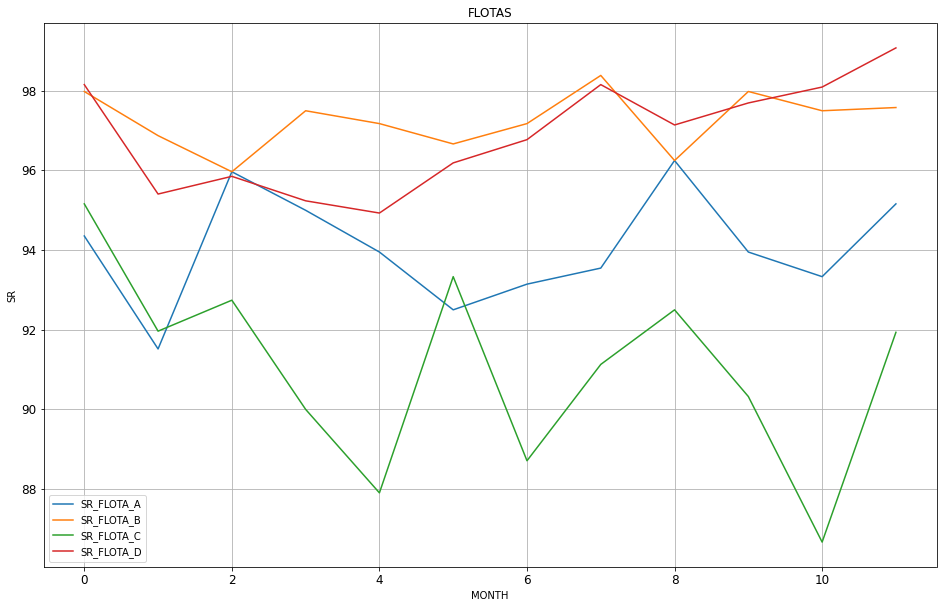

In [21]:
df[['SR_FLOTA_A','SR_FLOTA_B',"SR_FLOTA_C","SR_FLOTA_D"]].plot(figsize=(16, 10), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);
plt.grid()
plt.xlabel('MONTH')
plt.ylabel('SR')
plt.title('FLOTAS')